## Week 3 : Logistic Regression
```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Recap on Logistic Regression
2. Data for Classification Task
3. Classification task evaluation metrics
4. Dealing with data imbalance (self practice)
```

<hr>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Data for Classification Task

* How is data for regression different from classification task different?

Covid-19 Dataset collected is from March 2020 - November 2021. The target/goal is to predict the disease based on the patient state.

<strong>Target Feature: Corona Result.</strong>

<strong>Task:</strong> apply the tools of machine learning to predict which patients got infected by Covid-19.

## 2 Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Load Data

In [115]:
from sqlalchemy import create_engine, text

session_engine = create_engine('sqlite:///ml-labs-data.db')

with session_engine.connect() as conn:
    covid19_df = pd.read_sql_query(text('SELECT * FROM covid19_lab_sample'), con=conn, parse_dates=['test_date'])

covid19_df.drop('index', axis=1, inplace=True)
covid19_df.head()

test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0 2021-02-12      0      0            0                    0          0   
1 2020-10-14      0      0            0                    0          0   
2 2021-02-22      0      0            0                    0          0   
3 2021-03-06      1      0            0                    0          1   
4 2021-09-24      0      0            0                    0          0   

  corona_result age_60_and_above  gender         test_indication  age  
0      Positive               No    male                   Other   51  
1      Positive               No    male                   Other   47  
2      Positive               No  female  Contact with confirmed   35  
3      Positive               No  female  Contact with confirmed   37  
4      Positive               No  female  Contact with confirmed   51

## 3.1 Exploratory data analysis (EDA)

An approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods (i.e matplotlib, distribution plot ..)<br>
Today we are going to try a tool called [pandas profiling](https://github.com/pandas-profiling/pandas-profiling). It can be easily be installed with:
1. pip: `pip3 install pandas-profiling`  
1. conda: `conda install -c conda-forge pandas-profiling
`

**Note:** All that is done by pandas profilling can be easily be achieved with pandas, matplotlib and numpy

In [14]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c1fb2c1d488f07b1b6625bea2a52d5aad28116ef91126dc4f18aba4aad724f46
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [15]:
import ydata_profiling

# Create the data profile report
profileReport = ydata_profiling.profile_report.ProfileReport(covid19_df)

In [16]:
profileReport.to_file('covid_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3.2 Data preprocessing
1. How to deal with missing values?
1. How to deal with categorical data?
1. Is data scaling needed?

<span style="color:red">TASK: Split data to train and test</span> <br>
<span style="color:red">TASK: Impute missing values</span> <br>
<span style="color:red">TASK: Encode categorical features</span> <br>
<span style="color:red">TASK: Use min-max scaler for feature scaling </span> <br>

In [5]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.9 MB/s eta 0:00:00


In [125]:
covid19_df.loc[covid19_df['test_indication'].isna(), 'test_indication'] = np.nan

In [140]:
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

covid19_df = covid19_df.sort_values('test_date')
#Select features
covid19_df_2 = covid19_df.drop(['test_date'], axis = 1)

# Encode the target label
target_encoding = {'Negative':0, 'Positive':1}
covid19_df_2['corona_result'] = covid19_df_2['corona_result'].apply(lambda x : target_encoding.get(x))

y = covid19_df_2['corona_result']
X = covid19_df_2.drop(['corona_result'], axis=1)

# Split data to train and test
x_train, x_test, y_train, y_test =  train_test_split(X, y, train_size=0.8, shuffle=False)
print(x_train.isna().sum())
# imputing missing values
imputer = SimpleImputer(strategy='most_frequent') #most_frequent
imputer.fit(x_train, y_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_train.columns)

cough                    0
fever                    0
sore_throat              0
shortness_of_breath      0
head_ache                0
age_60_and_above         0
gender                   0
test_indication        176
age                      0
dtype: int64


In [141]:
print(x_train.isna().sum())

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_60_and_above       0
gender                 0
test_indication        0
age                    0
dtype: int64


In [118]:
x_train.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication', 'age'],
      dtype='object')

In [142]:
# encode categorical features
features_to_encode = ['test_indication', 'age_60_and_above', 'gender']
encoder = OneHotEncoder(cols=features_to_encode)

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

# TODO: feature scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train, y_train)

MinMaxScaler()

In [129]:
x_train.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above_1', 'age_60_and_above_2', 'gender_1', 'gender_2',
       'test_indication_1', 'test_indication_2', 'test_indication_3', 'age'],
      dtype='object')

## 4 Build, Train and Test Model

Now we are ready to see Logistic Regression in practice.

<span style="color:red">Task : Fit Logistic Regression  </span> <br>
<span style="color:red">Task : Output Accuracy, Precision, and Recall scores on test set </span>

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# fit Logistic Regression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

# calculate metrics
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))

Testing accuracy = 0.69
Testing precision = 0.9230769230769231
Testing recall = 0.33519553072625696


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Prediction Results Interpretation & Model perfomence Measurement

1. looking at Logistic Regression Coefficients
2. Prediction threshold

### Task :
1. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.

In [144]:
# Logistic Regression Coefficients
print("----Logistic Regression Coefficients----")
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

----Logistic Regression Coefficients----
('cough', 0.9552481638259074)
('fever', 1.6281959612389054)
('sore_throat', 1.550688600136889)
('shortness_of_breath', 0.45703779346328166)
('head_ache', 1.465635550222033)
('age_60_and_above_1', 0.08945130473649214)
('age_60_and_above_2', -0.1172064118879296)
('gender_1', -0.07314615945623922)
('gender_2', 0.04539105230468134)
('test_indication_1', -1.1036004927468148)
('test_indication_2', 1.2251553315604609)
('test_indication_3', -0.14930994596512254)
('age', 0.0070449485895911525)


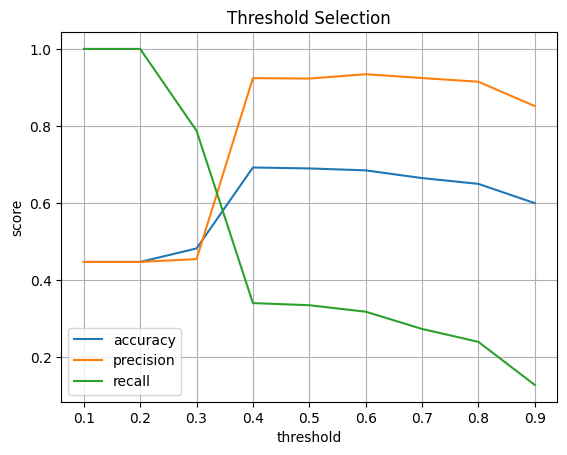

In [146]:
# TODO: calculate metrics for each threshold above and plot the result as below.
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
pred_proba = clf.predict_proba(x_test)

results = [[],[],[]]
for i in thresholds:
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))

plt.plot(thresholds, results[0], label = 'accuracy')
plt.plot(thresholds, results[1], label = 'precision')
plt.plot(thresholds, results[2], label = 'recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

# Confusion matrix

1. Why one may need confusion matrix?
2. What new information does it show? <br><br>

<table><tr><td>
<img align='center' src='https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg' style='width: 350px;'>
</td><td>
<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_002.png' style='width: 400px;'></td></tr></table>
<br>


<span style="color:red">Task: Implement a confussion matrix method from scratch using python list and numpy</span>

In [157]:
def calc_confusion_matrix(true_labels, pred_labels):
    """Compute confusion matrix to evaluate the accuracy of a classification

    Parameters
    ----------
    true_labels : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    pred_labels : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    """
    n = len(np.unique(true_labels))
    result = np.zeros((n, n), dtype=int)
    for i, j in zip(true_labels, pred_labels):
      result[i][j] += 1
    return result

In [159]:
## computing confusion matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print("Confusion Matrix for Test 1")
print(calc_confusion_matrix(y_true, y_pred))

titanic_cm = calc_confusion_matrix(y_test, clf.predict(x_test))
print('Confusion Matrix for Covid-19:\n', titanic_cm, '\n')

Confusion Matrix for Test 1
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Confusion Matrix for Covid-19:
 [[216   5]
 [119  60]] 



In [160]:
from sklearn.metrics import confusion_matrix
def calc_confusion_matrix(true_labels, pred_labels):
    """Compute confusion matrix to evaluate the accuracy of a classification

    Parameters
    ----------
    true_labels : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    pred_labels : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    """

    return confusion_matrix(true_labels, pred_labels)

In [161]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print("Confusion Matrix for Test 1")
print(calc_confusion_matrix(y_true, y_pred))

titanic_cm = calc_confusion_matrix(y_test, clf.predict(x_test))
print('Confusion Matrix for Covid-19:\n', titanic_cm, '\n')

Confusion Matrix for Test 1
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Confusion Matrix for Covid-19:
 [[216   5]
 [119  60]] 



## <center>Self-Practice  Task</center>

* Using `covid19-2.csv` dataset given to you.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Fill missing values
    1. Encode categorical features
    1. Create new features from the existing features
    1. Train a logistic regression model that will predict if a person is infected by COvid-19 `(corona_result)`.
    1. Select the optimal prediction threshold
    1. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.

In [ ]:
# Run this block of code to see what your result should look like
from sklearn.metrics import confusion_matrix
print('sklearn Confusion Matrix for Sample set:\n', confusion_matrix(y_true, y_pred))
print('sklearn Confusion Matrix for Covid-19:\n', confusion_matrix(y_test, clf.predict(x_test)), '\n')

## <center>Self-Practice  Task</center>

* Using `covid19-2.csv` dataset given to you.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Fill missing values
    1. Encode categorical features
    1. Create new features from the existing features
    1. Train a logistic regression model that will predict if a person is infected by COvid-19 `(corona_result)`.
    1. Select the optimal prediction threshold
    1. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.